### Let's build a Panda dataframe with all test data

#### Response codes and response messages


In [ ]:
#pip install --user matplotlib==3.1.0

In [35]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

df_codes_and_responses = pd.read_excel (r'./tests/CaptainServiceRegressionPack/Codes_Responses_modified.xls')
display(df_codes_and_responses.head(35))

,Competency,Intent response,Response_ID,Response
0,Fraud,csbFraudROne,FRAUD_R1,"Okay, so I can make sure you speak to the righ..."
1,Fraud,csbFraudRTwo,FRAUD_R2,I know it can be worrying if you think there’s...
2,Fraud,csbFraudRThree,FRAUD_R3,I know it can be worrying if you think there’s...
3,PinQuery,csbPinQrOne,PIN_Q_R1,The PIN for your new card will be the same as ...
4,PinQuery,csbPinQrTwo,PIN_Q_R2,I’m sorry to read your PIN hasn’t arrived yet....
5,OOS,csbOosROne,OOS_R1,could you try to rephrase your query for me? <...
6,OOS,csbOosRTwo,OOS_R2,I still don’t understand your query. I’ve plac...
7,CPD,csbCpdROne,CPD_R1,What personal information would you like to up...
8,CPD,csbCpdRTwo,CPD_R2,"To change your name, you’ll need to visit us i..."
9,CPD,csbCpdRThree,CPD_R3,If we do not have your correct date of birth y...


In [2]:
def found_match(short_str, long_str):
    short_str = pre_process_string(short_str)
    long_str = pre_process_string(long_str.values[0])
    return long_str.startswith(short_str)

def pre_process_response(string):
    temp = string.strip()
    temp = temp.replace('\n', '')
    temp = temp.replace('\t', '')
    temp = temp.replace('"', '')
    temp = temp.replace("'", '')
    temp = temp.replace("’", '')
    temp = temp.replace("‘", '')
    
    return temp

def pre_process_intent_code(string):
    temp = string.strip()
    temp = temp.lower()
    temp = temp.replace('\t', '')
    temp = temp.replace(' ', '')
    
    return temp

In [3]:
df_codes_and_responses['Response'] = df_codes_and_responses.apply(lambda x: pre_process_response(x['Response']), axis=1)
df_codes_and_responses['Intent response'] = df_codes_and_responses.apply(lambda x: pre_process_intent_code(x['Intent response']), axis=1)

In [4]:
df_codes_and_responses.head(5)

,Competency,Intent response,Response_ID,Response
0,Fraud,csbfraudrone,FRAUD_R1,"Okay, so I can make sure you speak to the righ..."
1,Fraud,csbfraudrtwo,FRAUD_R2,I know it can be worrying if you think theres ...
2,Fraud,csbfraudrthree,FRAUD_R3,I know it can be worrying if you think theres ...
3,PinQuery,csbpinqrone,PIN_Q_R1,The PIN for your new card will be the same as ...
4,PinQuery,csbpinqrtwo,PIN_Q_R2,Im sorry to read your PIN hasnt arrived yet.<b...


In [5]:
def get_response_msg(intent_code):
    row = df_codes_and_responses.loc[df_codes_and_responses['Intent response'] == pre_process_intent_code(intent_code)]
    return row['Response_ID'].values[0], row['Response'].values[0]

In [6]:
response_id, response_msg = get_response_msg('csbPinQrOne')
print(response_id)
print('------------------------------------------')
print(response_msg)

PIN_Q_R1
------------------------------------------
The PIN for your new card will be the same as your old one, unless you reported your old card lost or stolen and asked for a new PIN.<br>If you did, a new PIN will be sent to you in the post separately to the card. If youre having trouble remembering your old PIN I can help remind you of it.


In [7]:
def get_competency(intent_code):
    intent_code = pre_process_intent_code(intent_code)
    df = df_codes_and_responses.loc[df_codes_and_responses['Intent response'] == intent_code]
    return df.Competency.unique()

In [8]:
competency_list = get_competency('csbPinQrOne')
print(competency_list)

['PinQuery']


In [9]:
def get_response_intent_codes(response_msg):
    pre_response_msg = pre_process_response(response_msg)
    for index, row in df_codes_and_responses.iterrows():
        if row['Response'] in pre_response_msg:
            return row['Intent response'], row['Response_ID']
    return  '*', '*'        

In [10]:
intent_code, response_id = get_response_intent_codes(
    '''Dealing with the financial affairs of someone close to you when you’re grieving is never easy.
<br>
I’ll place you in the queue to message with a member of our bereavement team as soon as they become available.''')
print(intent_code)
print('------------------------------------------')
print(response_id)

csbberrone
------------------------------------------
BER_R1


#### Building the test-suit

In [13]:
import boto3
import uuid
uid = str(uuid.uuid4())


In [14]:
df_ber = pd.read_excel (r'./tests/CaptainServiceRegressionPack/BereavementTestSuit-V3.xlsx')
df_cpd = pd.read_excel (r'./tests/CaptainServiceRegressionPack/ChangePersonalDetails-V1.2.xlsx')
df_oos = pd.read_excel (r'./tests/CaptainServiceRegressionPack/Out_Of_Scope_TestSuit-V3.xls')
df_ove = pd.read_excel (r'./tests/CaptainServiceRegressionPack/OverdraftTestSuit-V12.xlsx')

In [15]:
df_test_suit = df_ber.append(df_cpd)
df_test_suit = df_test_suit.append(df_oos)
df_test_suit = df_test_suit.append(df_ove)

print(df_test_suit.shape[0])

358


In [16]:
df_test_suit = df_test_suit.dropna(axis=0, how='any')

print(df_test_suit.shape[0])

352


In [17]:
df_test_suit.rename(columns={"Bot": "Expected intent code"}, inplace=True)

In [18]:
df_test_suit['Expected competency'] = ''
df_test_suit['Expected response ID'] = ''
df_test_suit['Actual response'] = ''
df_test_suit['Actual competency'] = ''
df_test_suit['Actual intent code'] = ''
df_test_suit['Actual response ID'] = ''
df_test_suit.reset_index(drop=True, inplace=True)

Column_order = ['User',
 'Expected competency',
 'Expected intent code',
 'Expected response ID',
 'Actual response',
 'Actual competency',
 'Actual intent code',
 'Actual response ID']

df_test_suit = df_test_suit[Column_order]

df_test_suit[300:310].head(3)

,User,Expected competency,Expected intent code,Expected response ID,Actual response,Actual competency,Actual intent code,Actual response ID
300,"How do I get, or increase, an arranged overdraft?",,INTENT csbOdRTwo,,,,,
301,what are the ways to increase overdraft?,,INTENT csbOdRTwo,,,,,
302,how can I enhance my overdraft limit?,,INTENT csbOdRTwo,,,,,


In [19]:
def remove_intent(bot_intent):
    if 'INTENT ' in str(bot_intent):
        bot_intent = bot_intent.replace('INTENT ', '')
    return pre_process_intent_code(bot_intent)

df_test_suit['Expected intent code'] = df_test_suit.apply(lambda x: remove_intent(x['Expected intent code']), axis=1)

In [20]:
def add_competency(bot_intent):
    bot_intent = pre_process_intent_code(bot_intent)
    return get_competency(bot_intent)[0]

df_test_suit['Expected competency'] = df_test_suit.apply(lambda x: add_competency(x['Expected intent code']), axis=1)

In [21]:
df_test_suit[100:140].head(3)

,User,Expected competency,Expected intent code,Expected response ID,Actual response,Actual competency,Actual intent code,Actual response ID
100,Update my nationality please,CPD,csbcpdrfive,,,,,
101,Please update my nationality to the following…,CPD,csbcpdrfive,,,,,
102,I want to update my nationality details correc...,CPD,csbcpdrfive,,,,,


#### Getting responses from the bot

In [22]:
for index, row in df_test_suit.iterrows():
    question = row['User']
    response = client.post_text(botName='CptServiceBot', botAlias='Live', userId=uid, inputText=question)
    if index % 100 == 0:
        print(index)    
    response_str = pre_process_response(response['message'])
    df_test_suit.iat[index, 4] = response_str 
    intent_code, _ = get_response_intent_codes(response_str)
    competency = get_competency(intent_code)
    if not competency:
        competency = 'None'
    else:
        competency = competency[0]
    df_test_suit.iat[index, 5] = competency
    df_test_suit.iat[index, 6] = intent_code    

0
100
200
300


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # Remove the CWD from sys.path while we load stuff.


In [23]:
display(df_test_suit[300:350].head(5))

,User,Expected competency,Expected intent code,Expected response ID,Actual response,Actual competency,Actual intent code,Actual response ID
300,"How do I get, or increase, an arranged overdraft?",Overdraft,csbodrtwo,,You can increase your overdraft of £100 up to ...,Overdraft,csbodrtwo,
301,what are the ways to increase overdraft?,Overdraft,csbodrtwo,,You currently have the maximum overdraft limit...,Overdraft,csbodrtwo_1,
302,how can I enhance my overdraft limit?,Overdraft,csbodrtwo,,You currently have the maximum overdraft limit...,Overdraft,csbodrtwo_1,
303,how can I increase my overdraft ?,Overdraft,csbodrtwo,,You can increase your overdraft of £100 up to ...,Overdraft,csbodrtwo,
304,how can I enhance my overdraft ?,Overdraft,csbodrtwo,,You currently have the maximum overdraft limit...,Overdraft,csbodrtwo_1,


In [24]:
def extract_main_intent(intent):
    index = intent.find('_')
    if index != -1:
        return intent[:index]
    return intent

df_test_suit['Actual intent code'] = df_test_suit.apply(lambda x: extract_main_intent(x['Actual intent code']), axis=1)

In [25]:
display(df_test_suit[300:350].head(5))

,User,Expected competency,Expected intent code,Expected response ID,Actual response,Actual competency,Actual intent code,Actual response ID
300,"How do I get, or increase, an arranged overdraft?",Overdraft,csbodrtwo,,You can increase your overdraft of £100 up to ...,Overdraft,csbodrtwo,
301,what are the ways to increase overdraft?,Overdraft,csbodrtwo,,You currently have the maximum overdraft limit...,Overdraft,csbodrtwo,
302,how can I enhance my overdraft limit?,Overdraft,csbodrtwo,,You currently have the maximum overdraft limit...,Overdraft,csbodrtwo,
303,how can I increase my overdraft ?,Overdraft,csbodrtwo,,You can increase your overdraft of £100 up to ...,Overdraft,csbodrtwo,
304,how can I enhance my overdraft ?,Overdraft,csbodrtwo,,You currently have the maximum overdraft limit...,Overdraft,csbodrtwo,


### Confusion Matrix and Statistics per Competency

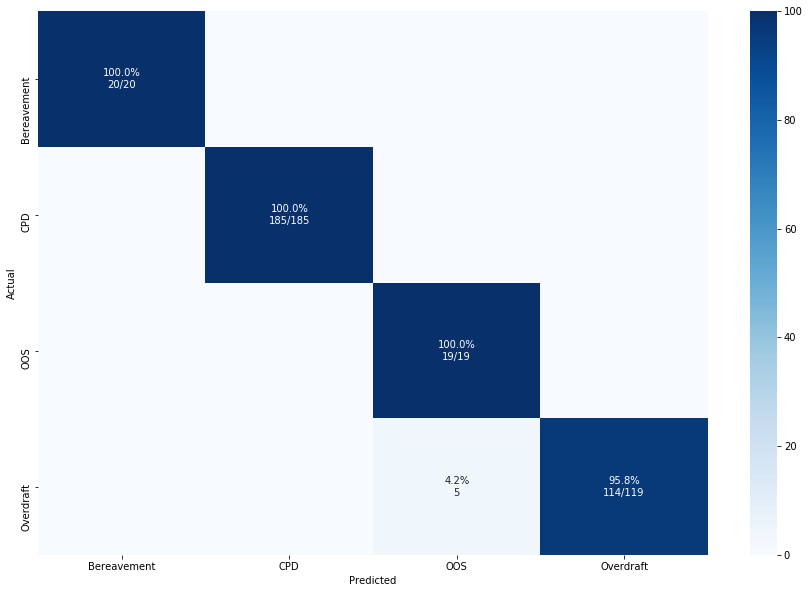

<Figure size 1440x720 with 0 Axes>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels=None, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm_perc, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap="Blues")
    plt.figure(figsize=(20,10))
    plt.show()
    
cm_analysis(df_test_suit['Expected competency'], df_test_suit['Actual competency'], labels=['Bereavement', 'CPD', 'OOS', 'Overdraft'], figsize=(15,10))

In [36]:
from pandas_ml import ConfusionMatrix

confusion_matrix = ConfusionMatrix(df_test_suit['Expected competency'], df_test_suit['Actual competency'])

In [37]:
stats_class= confusion_matrix.stats()['class']

In [38]:
# Drop column
#stats_class.drop('*', inplace=True, axis=1)

In [39]:
from collections import Counter

# Drop rows
all_rows = list(stats_class.index.values)
keep_rows = ['TP: True Positive', 'TN: True Negative', 'FP: False Positive', 'FN: False Negative', 'TPR: (Sensitivity, hit rate, recall)', 'TNR=SPC: (Specificity)', 'ACC: Accuracy', 'F1 score']
remove_rows = list((Counter(all_rows)-Counter(keep_rows)).elements()) 
stats_class.drop(remove_rows, inplace=True, axis=0)

In [40]:
stats_class

Classes,Bereavement,CPD,Fraud,None,OOS,Overdraft,PinQuery
TP: True Positive,20,185,2,0,19,114,5
TN: True Negative,332,167,350,351,327,232,346
FP: False Positive,0,0,0,1,5,0,1
FN: False Negative,0,0,0,0,1,6,0
"TPR: (Sensitivity, hit rate, recall)",1,1,1,NaN,0.95,0.95,1
TNR=SPC: (Specificity),1,1,1,0.997159,0.98494,1,0.997118
ACC: Accuracy,1,1,1,0.997159,0.982955,0.982955,0.997159
F1 score,1,1,1,0,0.863636,0.974359,0.909091
